# Convert model to TFLite

 - Convert model files to a TFLite model
 - Grab TFLite interpreter and test model

## Config

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import cv2

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12

In [17]:
model_path = '../models/pilot_mobilenet-v3-xfer/v1_poison_ivy_mobilenet-v3-small_classifier'
tflite_path = '../models/pilot_mobilenet-v3-xfer/v1_poison_ivy_mobilenet-v3.tflite'

metadata_path = '../datasets/pilot_final/dataset_metadata.csv'

## Convert and store TFLite model

In [9]:
converter = tf.lite.TFLiteConverter.from_saved_model(model_path)
tflite_model = converter.convert()

In [10]:
tflite_path_obj = Path(tflite_path)
tflite_path_obj.write_bytes(tflite_model)

8205608

## Test TFLite model

### Make model

In [13]:
interpreter = tf.lite.Interpreter(model_path=tflite_path)
interpreter.allocate_tensors()

In [26]:
input_details = interpreter.get_input_details()
input_index = input_details[0]['index']
output_details = interpreter.get_output_details()
output_index = output_details[0]['index']


### Get example images

In [18]:
df_ims = pd.read_csv(metadata_path)
df_ims.head()

,name,full_path,image_dims,is_readable,original_path,original_image_dims,path_suffix,label,filter_results,keep_image,split,new_full_path
0,Blackberries_plant_1.jpg,/home/code/datasets/pilot_resized/negative/Bla...,"(399, 300)",True,/home/code/datasets/pilot_raw/negative/Blackbe...,"(1662, 1247)",./negative/Blackberries_plant_1.jpg,negative,"(True, 'Passed')",True,train,/home/code/datasets/pilot_final/train/negative...
1,Blackberries_plant_10.jpg,/home/code/datasets/pilot_resized/negative/Bla...,"(571, 300)",True,/home/code/datasets/pilot_raw/negative/Blackbe...,"(1200, 630)",./negative/Blackberries_plant_10.jpg,negative,"(True, 'Passed')",True,train,/home/code/datasets/pilot_final/train/negative...
2,Blackberries_plant_2.jpg,/home/code/datasets/pilot_resized/negative/Bla...,"(378, 300)",True,/home/code/datasets/pilot_raw/negative/Blackbe...,"(1556, 1234)",./negative/Blackberries_plant_2.jpg,negative,"(True, 'Passed')",True,train,/home/code/datasets/pilot_final/train/negative...
3,Blackberries_plant_3.jpg,/home/code/datasets/pilot_resized/negative/Bla...,"(300, 400)",True,/home/code/datasets/pilot_raw/negative/Blackbe...,"(450, 600)",./negative/Blackberries_plant_3.jpg,negative,"(True, 'Passed')",True,train,/home/code/datasets/pilot_final/train/negative...
4,Blackberries_plant_4.jpg,/home/code/datasets/pilot_resized/negative/Bla...,"(400, 300)",True,/home/code/datasets/pilot_raw/negative/Blackbe...,"(1280, 960)",./negative/Blackberries_plant_4.jpg,negative,"(True, 'Passed')",True,val,/home/code/datasets/pilot_final/val/negative/B...


In [22]:
pos_examples = df_ims[
    (df_ims['split'] == 'val') & (df_ims['label'] == 'positive')
].sample(3)
pos_examples

,name,full_path,image_dims,is_readable,original_path,original_image_dims,path_suffix,label,filter_results,keep_image,split,new_full_path
162,poison_ivy_vines_45.jpg,/home/code/datasets/pilot_resized/positive/poi...,"(300, 481)",True,/home/code/datasets/pilot_raw/positive/poison_...,"(866, 1390)",./positive/poison_ivy_vines_45.jpg,positive,"(True, 'Passed')",True,val,/home/code/datasets/pilot_final/val/positive/p...
100,poison_ivy_plant_24.jpg,/home/code/datasets/pilot_resized/positive/poi...,"(300, 449)",True,/home/code/datasets/pilot_raw/positive/poison_...,"(641, 961)",./positive/poison_ivy_plant_24.jpg,positive,"(True, 'Passed')",True,val,/home/code/datasets/pilot_final/val/positive/p...
90,poison_ivy_plant_12.jpg,/home/code/datasets/pilot_resized/positive/poi...,"(400, 300)",True,/home/code/datasets/pilot_raw/positive/poison_...,"(4000, 3000)",./positive/poison_ivy_plant_12.jpg,positive,"(True, 'Passed')",True,val,/home/code/datasets/pilot_final/val/positive/p...


In [23]:
neg_examples = df_ims[
    (df_ims['split'] == 'val') & (df_ims['label'] == 'negative')
].sample(3)
neg_examples

,name,full_path,image_dims,is_readable,original_path,original_image_dims,path_suffix,label,filter_results,keep_image,split,new_full_path
21,Fragrant_sumac_plant_2.jpg,/home/code/datasets/pilot_resized/negative/Fra...,"(451, 300)",True,/home/code/datasets/pilot_raw/negative/Fragran...,"(900, 598)",./negative/Fragrant_sumac_plant_2.jpg,negative,"(True, 'Passed')",True,val,/home/code/datasets/pilot_final/val/negative/F...
71,Virginia_creeper_plant_1.jpg,/home/code/datasets/pilot_resized/negative/Vir...,"(374, 300)",True,/home/code/datasets/pilot_raw/negative/Virgini...,"(974, 781)",./negative/Virginia_creeper_plant_1.jpg,negative,"(True, 'Passed')",True,val,/home/code/datasets/pilot_final/val/negative/V...
9,Blackberries_plant_9.jpg,/home/code/datasets/pilot_resized/negative/Bla...,"(300, 449)",True,/home/code/datasets/pilot_raw/negative/Blackbe...,"(534, 800)",./negative/Blackberries_plant_9.jpg,negative,"(True, 'Passed')",True,val,/home/code/datasets/pilot_final/val/negative/B...


### Predict example images

In [64]:
def prepare_image(im_path: str, img_shape: np.ndarray) -> np.ndarray:
    img = cv2.imread(im_path)
    return(cv2.resize(img, img_shape))

def get_prediction(img: np.ndarray, interpreter, input_index, output_index) -> np.ndarray:
    # Pass to tflite interpreter
    interpreter.set_tensor(input_index, img)
    interpreter.invoke()
    return(interpreter.get_tensor(output_index))

In [66]:
input_shape = input_details[0]['shape']
img_shape = input_shape[1:3]
input_dtype = input_details[0]['dtype']

pos_images = [prepare_image(im_path, img_shape) for im_path in pos_examples['new_full_path']]
neg_images = [prepare_image(im_path, img_shape) for im_path in neg_examples['new_full_path']]

img = np.array(pos_images[0], dtype=input_dtype)
img = np.expand_dims(img, 0)
get_prediction(img, interpreter, input_index, output_index)

array([[0.94175947]], dtype=float32)

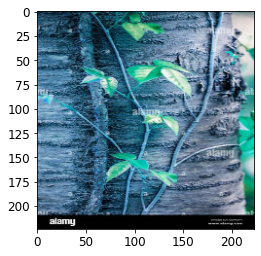

In [67]:
plt.imshow(pos_images[0])

In [78]:
def sigmoid(x):
    return(1/(1 + np.exp(-x)))

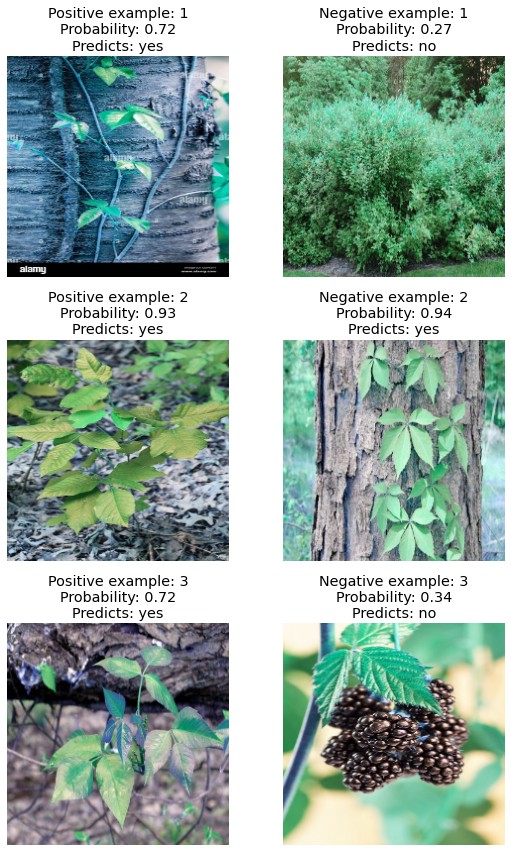

In [81]:
threshold = 0.5
n_ims = min(len(pos_images), len(neg_images))

plt.figure(figsize=(8,12))
for i in range(n_ims):
    pred = sigmoid(get_prediction(np.expand_dims(np.array(pos_images[i], dtype=input_dtype), 0),
                                  interpreter, input_index, output_index)[0][0])
    
    plt.subplot(n_ims, 2, 1 + i*2)
    plt.axis('off')
    plt.title(f"Positive example: {i+1}\nProbability: {pred:.2f}\n"
              f"Predicts: {'yes' if pred >= threshold else 'no'}")
    plt.imshow(pos_images[i])
    
    pred = sigmoid(get_prediction(np.expand_dims(np.array(neg_images[i], dtype=input_dtype), 0),
                                  interpreter, input_index, output_index)[0][0])
    plt.subplot(n_ims, 2, 2 + i*2)
    plt.axis('off')
    plt.title(f"Negative example: {i+1}\nProbability: {pred:.2f}\n"
              f"Predicts: {'yes' if pred >= threshold else 'no'}")
    plt.imshow(neg_images[i])
plt.tight_layout()
plt.show()